In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df_1 = pd.read_csv('/Users/wafic/Downloads/data/my_say/QAID.csv')

In [8]:
df_2 = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Answers.csv')

In [9]:
df_3 = pd.read_csv('/Users/wafic/Downloads/data/my_say/User_Question_Answer.csv', low_memory=False)

In [10]:
df_2.head(5)

,question_id,title,start_age,end_age,sex_id,category_id,nb_targets,nb_points,created_at,updated_at,topic_id,prefered_lang,rank,Total_Number_of_Answers,answer_id,description,Number_Of_Answers
0,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60570,Yes,1943
1,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60571,No,1057
2,21104,Which water brand do you prefer?,10,80,0.0,12,2000,1,2018-09-07 12:51:52,2018-09-07 12:55:01,0,NaN,1,2000,60724,Sohat,698
3,21104,Which water brand do you prefer?,10,80,0.0,12,2000,1,2018-09-07 12:51:52,2018-09-07 12:55:01,0,NaN,1,2000,60725,Rim,337
4,21104,Which water brand do you prefer?,10,80,0.0,12,2000,1,2018-09-07 12:51:52,2018-09-07 12:55:01,0,NaN,1,2000,60726,Sannine,139


In [13]:
quest = df_2[['question_id', 'category_id']]

In [27]:
# Drop duplicates
quest_unique = quest.drop_duplicates()

In [32]:
results = df_3[['user_id', 'question_id', 'answer_id']]

In [33]:
results.head()

,user_id,question_id,answer_id
0,10109,21045,60570
1,10135,21045,60571
2,10237,21045,60571
3,10261,21045,60570
4,10268,21045,60571


In [83]:
results.isnull().sum()

user_id           0
question_id       0
answer_id      2606
dtype: int64

In [84]:
results = results.dropna()

In [85]:
len(results)

509804

In [86]:
results.isnull().sum()

user_id        0
question_id    0
answer_id      0
dtype: int64

In [87]:
df = results.merge(quest_unique, on='question_id', how='inner')

In [88]:
df.shape

(509803, 4)

In [89]:
df.head()

,user_id,question_id,answer_id,category_id
0,10109,21045,60570,7
1,10135,21045,60571,7
2,10237,21045,60571,7
3,10261,21045,60570,7
4,10268,21045,60571,7


In [90]:
df.category_id.value_counts(normalize=True)*100

10    22.718972
18    12.924993
14    12.161757
4     10.095076
3      8.783197
7      6.788701
17     6.245550
11     4.845401
6      4.704562
5      2.746159
9      1.961542
12     1.765388
15     1.569234
16     1.442518
1      0.784617
13     0.392308
8      0.070027
Name: category_id, dtype: float64

In [92]:
df.dtypes

user_id         int64
question_id     int64
answer_id      object
category_id     int64
dtype: object

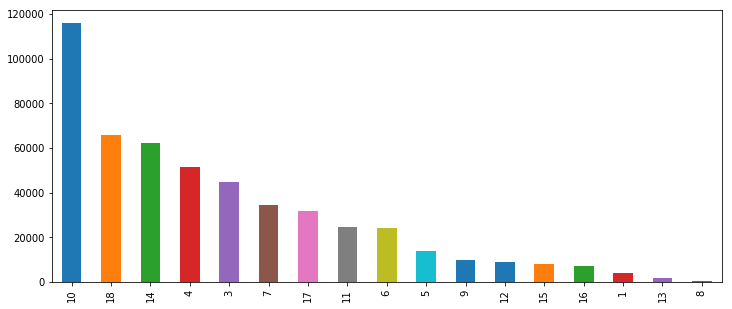

In [93]:
df.category_id.value_counts().plot(kind='bar', figsize=(12,5))

## Split data for testing

In [94]:
df.columns

Index(['user_id', 'question_id', 'answer_id', 'category_id'], dtype='object')

In [95]:
from sklearn.model_selection import train_test_split
X = df[['user_id', 'question_id', 'answer_id']]
y = df[['category_id']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

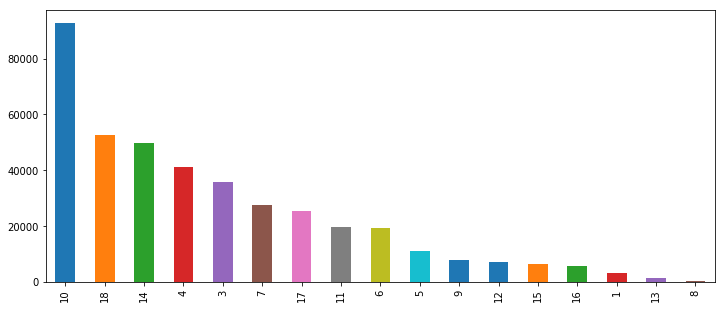

In [96]:
# Check of the training dataset preserves the same shape of the original data
pd.concat([X_train, y_train], axis=1).category_id.value_counts().plot(kind='bar', figsize=(12,5))

## Building Model

In [124]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=20, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
y_pred = m.predict(X_test)

In [126]:
# pd.crosstab(y_train, y_pred,  rownames=['Actual Cats'], colnames=['Predicted Cats'])
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9997646158825433